In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import analysis

In [2]:
wt_slab = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/CPEB4x50', equil_frames=0)

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


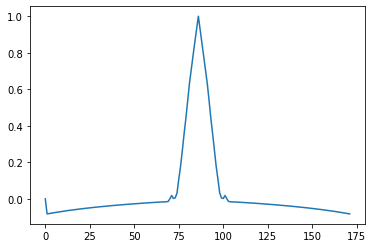

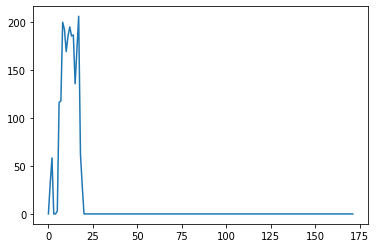

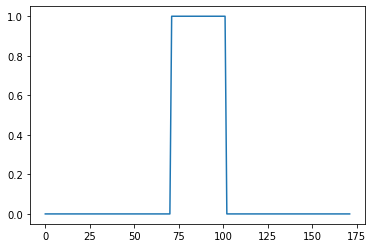

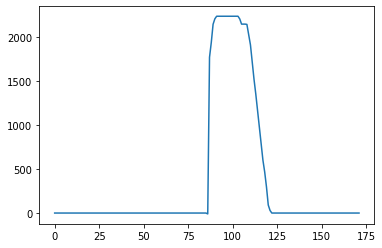

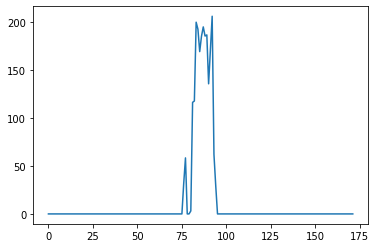

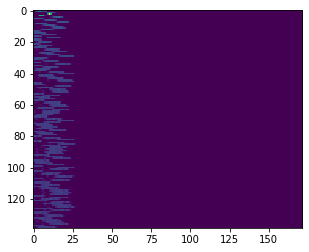

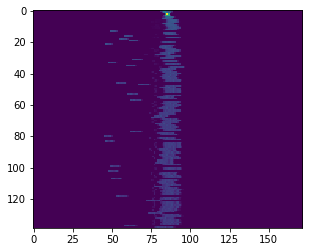

In [25]:
c, a, sh, caa, pa = wt_slab.paper_density_profile(T=0, noise=True)

plt.figure()
plt.plot(caa[-5,:])
plt.figure()
plt.plot(a[-5,:])
plt.figure()
plt.plot(pa[-5,:])
plt.figure()
plt.plot(c[-5,:])
plt.figure()
plt.plot(sh[-5,:])

plt.figure()
plt.imshow(a)
plt.figure()
plt.imshow(sh)

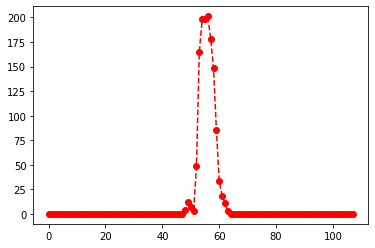

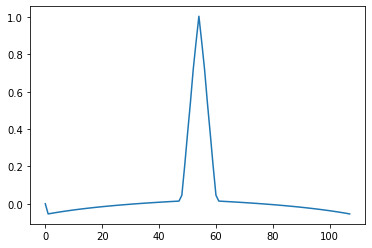

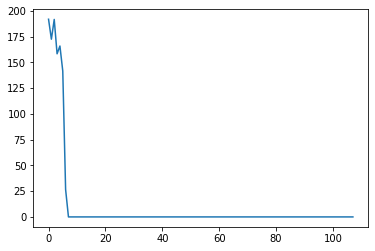

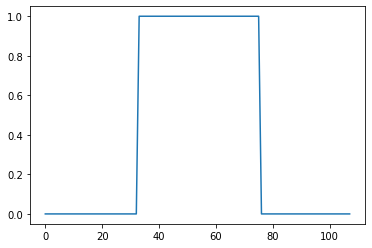

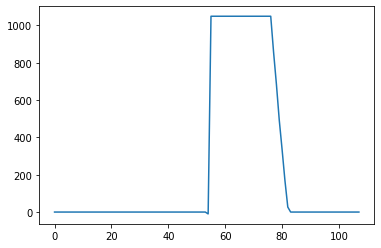

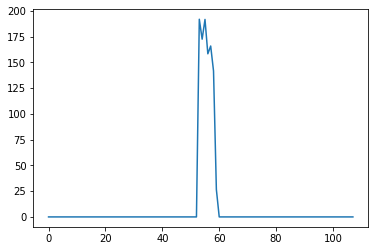

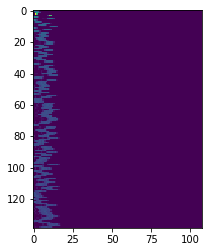

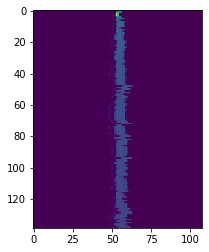

In [141]:
c, a, sh, caa, pa, rho_z = wt_slab.paper_density_profile(T=0, noise=True)

plt.plot(rho_z, '--ro')

plt.figure()
plt.plot(caa[-5,:])
plt.figure()
plt.plot(a[-5,:])
plt.figure()
plt.plot(pa[-5,:])
plt.figure()
plt.plot(c[-5,:])
plt.figure()
plt.plot(sh[-5,:])

plt.figure()
plt.imshow(a)
plt.figure()
plt.imshow(sh)

[0.56883133 1.48587355]


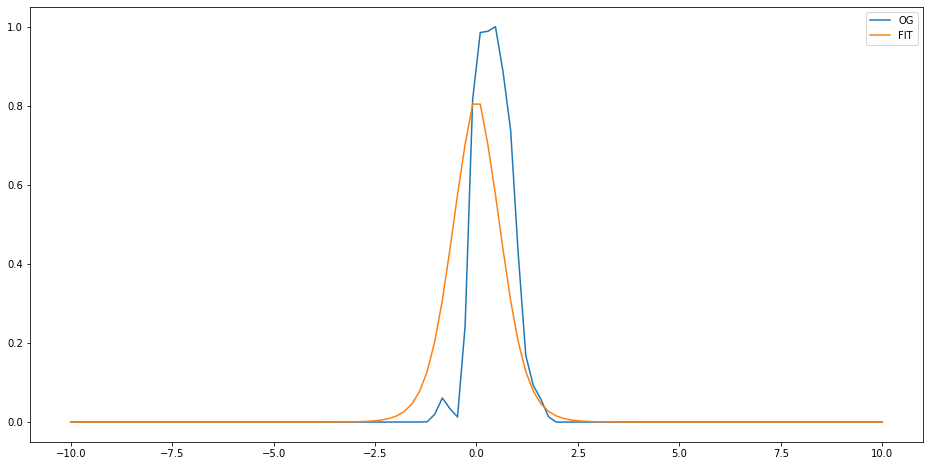

In [186]:
from scipy.optimize import curve_fit
import numpy as np

plt.figure(figsize=(16,8))

def tanh(x, interface_pos, interface_width):
    y = 0.5*np.tanh((interface_pos - np.abs(x))*interface_width)+0.5
    return y

data = rho_z
data /= np.max(data)
x = np.linspace(-10,10,data.shape[0])

popt, pcov = curve_fit(tanh, x, data)

plt.plot(x, data, label='OG')
plt.plot(x, tanh(x, *popt), label='FIT')
print(popt)
plt.legend()

### Create your own tanh profile adventure

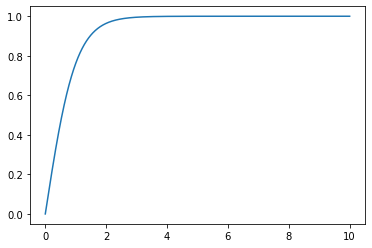

In [156]:
def tanh(x):
    y = np.tanh(x)
    return y

x=np.linspace(0,10,1000)
plt.plot(x,tanh(x))

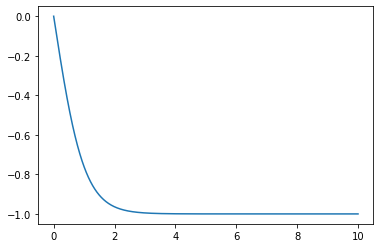

In [157]:
# invert tendency
def tanh(x):
    y = np.tanh(-x)
    return y

x=np.linspace(0,10,1000)
plt.plot(x,tanh(x))

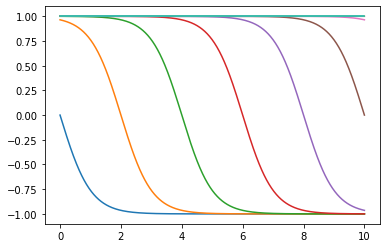

In [192]:
# shift interface
def tanh(x, interface_pos):
    y = np.tanh(-x + interface_pos)
    return y

x=np.linspace(0,10,1000)
for pos in range(0,20,2):
    plt.plot(x,tanh(x, pos))

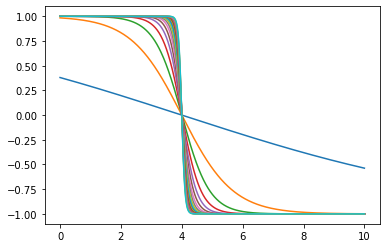

In [194]:
# reduce condensed phase
# higher values mean sharper interface
def tanh(x, interface_pos, interface_width):
    y = np.tanh((interface_pos - x)*interface_width)
    return y

x=np.linspace(0,10,1000)
for width in np.arange(0.1,10.1,0.5):
    plt.plot(x,tanh(x, 4, width))

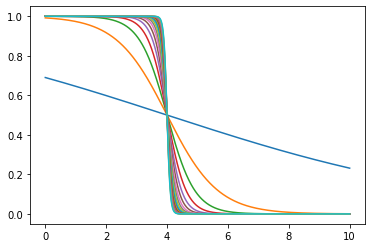

In [195]:
# Fix : Function going from 1 to -1, we want it to go from 1 to 0

def tanh(x, interface_pos, interface_width):
    y = 0.5*np.tanh((interface_pos - x)*interface_width)+0.5
    return y

x=np.linspace(0,10,1000)
for width in np.arange(0.1,10.1,0.5):
    plt.plot(x,tanh(x, 4, width))

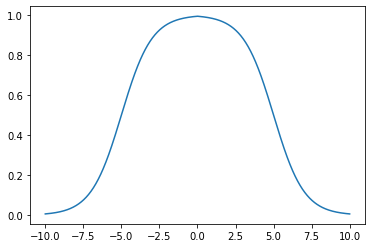

In [188]:
# Final step : Duplicate on y axis to obtain profile in both directions

def tanh(x, interface_pos, interface_width):
    y = 0.5*np.tanh((interface_pos - np.abs(x))*interface_width)+0.5
    return y

x=np.linspace(-10,10,1000)
plt.plot(x,tanh(x, 5, 0.5))

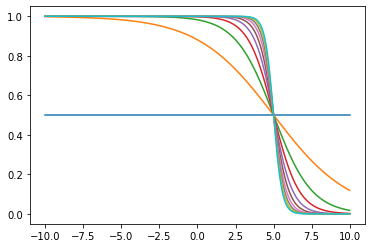

In [211]:
def tanh(x,s,x0 ):
    y = 0.5-0.5*np.tanh((x+x0)*s)
    return y

x=np.linspace(-10,10,1000)
for ss in np.arange(0,2,0.2):
    plt.plot(x,tanh(x, ss,-5))